## 1. Import dan Initialize Model

In [2]:
import sys
sys.path.append('..')

from facenet import FaceNetModel
import matplotlib.pyplot as plt
import numpy as np

# Initialize FaceNet model
model = FaceNetModel(device='cuda')

🖥️  Device: cuda
✅ MTCNN loaded on CPU
✅ FaceNet (InceptionResnetV1) loaded on cuda
   Embedding dimension: 512
✅ FaceNet (InceptionResnetV1) loaded on cuda
   Embedding dimension: 512


## 2. Load Dataset

Load training dataset dan extract embeddings menggunakan FaceNet.

In [3]:
# Path ke training dataset
data_dir = "../../train/train"

# Load dataset dengan augmentation
embeddings, labels = model.load_dataset(data_dir, augment=True)

print(f"\n📊 Dataset Summary:")
print(f"   Total samples: {len(embeddings)}")
print(f"   Embedding dimension: {embeddings.shape[1]}")
print(f"   Unique persons: {len(set(labels))}")


🚀 Loading dataset from: ../../train/train

📂 Processing: Abraham Ganda Napitu

📂 Processing: Abu Bakar Siddiq Siregar

📂 Processing: Abu Bakar Siddiq Siregar

📂 Processing: Ahmad Faqih Hasani

📂 Processing: Ahmad Faqih Hasani

📂 Processing: Aldi Sanjaya

📂 Processing: Aldi Sanjaya
  ⚠️  No face: IMG_3149 - ALDI SANJAYA.jpeg
  ⚠️  No face: IMG_3149 - ALDI SANJAYA.jpeg
  ⚠️  No face: IMG_3150 - ALDI SANJAYA.jpeg
  ⚠️  No face: IMG_3150 - ALDI SANJAYA.jpeg
  ⚠️  No face: IMG_3151 - ALDI SANJAYA.jpeg

📂 Processing: Alfajar
  ⚠️  No face: IMG_3151 - ALDI SANJAYA.jpeg

📂 Processing: Alfajar

📂 Processing: Alief Fathur Rahman

📂 Processing: Alief Fathur Rahman

📂 Processing: Arkan Hariz Chandrawinata Liem

📂 Processing: Arkan Hariz Chandrawinata Liem

📂 Processing: Bayu Ega Ferdana

📂 Processing: Bayu Ega Ferdana

📂 Processing: Bayu Prameswara Haris

📂 Processing: Bayu Prameswara Haris

📂 Processing: Bezalel Samuel Manik

📂 Processing: Bezalel Samuel Manik

📂 Processing: Bintang Fikri Fauzan

## 3. Train Classifier

Train classifier head di atas FaceNet embeddings.

In [4]:
# Training configuration
history = model.train_classifier(
    num_epochs=50,
    batch_size=32,
    learning_rate=1e-3,
    validation_split=0.2
)


🎓 Training classifier...
📊 Data split:
   Training: 822 samples
   Validation: 206 samples
   Classes: 68

Epoch    | Train Loss   | Train Acc    | Val Loss     | Val Acc      | Status         
1        | 4.2079       | 2.07         | 4.1807       | 10.19        | ✅ BEST         
2        | 4.1231       | 10.83        | 4.0078       | 19.90        | ✅ BEST         
1        | 4.2079       | 2.07         | 4.1807       | 10.19        | ✅ BEST         
2        | 4.1231       | 10.83        | 4.0078       | 19.90        | ✅ BEST         
3        | 3.8077       | 12.17        | 3.5813       | 24.76        | ✅ BEST         
4        | 3.3901       | 21.17        | 3.1151       | 46.12        | ✅ BEST         
5        | 2.9046       | 32.85        | 2.5750       | 51.94        | ✅ BEST         
3        | 3.8077       | 12.17        | 3.5813       | 24.76        | ✅ BEST         
4        | 3.3901       | 21.17        | 3.1151       | 46.12        | ✅ BEST         
5        | 2.9046     

## 4. Visualisasi Training History

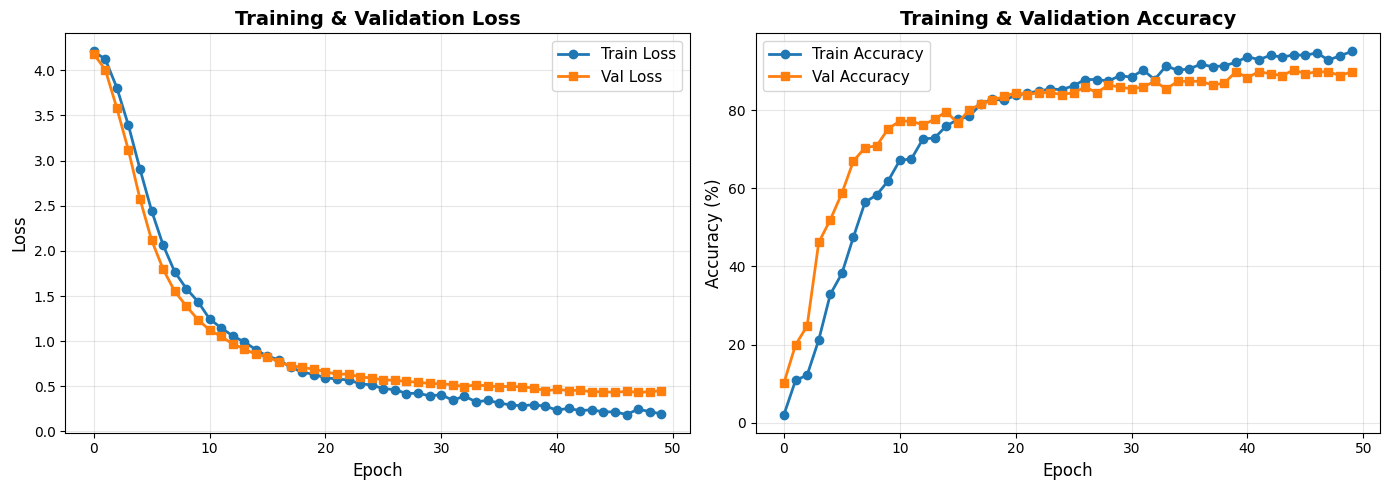


📊 Final Metrics:
   Final Train Accuracy: 95.01%
   Final Val Accuracy: 89.81%
   Best Val Accuracy: 90.29%


In [5]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history['train_loss'], label='Train Loss', marker='o', linewidth=2)
axes[0].plot(history['val_loss'], label='Val Loss', marker='s', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy plot
axes[1].plot(history['train_acc'], label='Train Accuracy', marker='o', linewidth=2)
axes[1].plot(history['val_acc'], label='Val Accuracy', marker='s', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\n📊 Final Metrics:")
print(f"   Final Train Accuracy: {history['train_acc'][-1]:.2f}%")
print(f"   Final Val Accuracy: {history['val_acc'][-1]:.2f}%")
print(f"   Best Val Accuracy: {max(history['val_acc']):.2f}%")

## 5. Save Model

In [6]:
# Save model
model_path = model.save_model('./models')
print(f"Model saved to: {model_path}")


💾 Model saved!
   Embeddings: ./models\facenet_model_20251130_164300.pkl
   Classifier: ./models\facenet_classifier_20251130_164300.pth
Model saved to: ./models\facenet_model_20251130_164300.pkl


## 6. Test pada Single Image

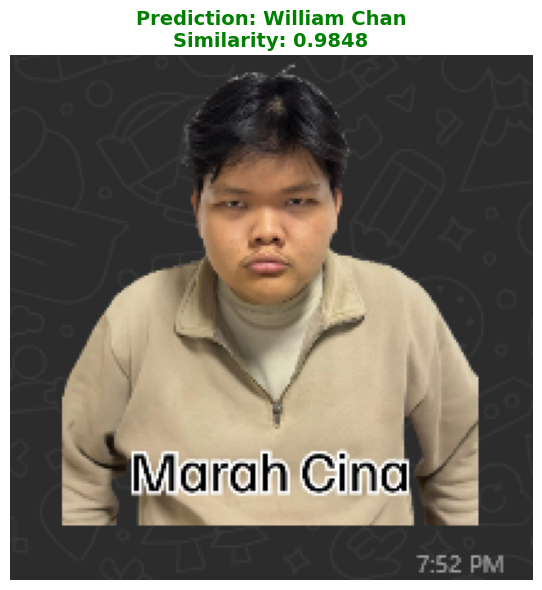


🎯 Prediction: William Chan
📊 Similarity: 0.9848


In [17]:
import cv2
from PIL import Image

# Test image path
test_image_path = "../../test/4.png"

# Predict
predicted_name, similarity = model.predict(test_image_path, threshold=0.6)

# Load dan display image
img = cv2.imread(test_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_name}\nSimilarity: {similarity:.4f}", 
          fontsize=14, fontweight='bold', 
          color='green' if predicted_name != 'Unknown' else 'red')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\n🎯 Prediction: {predicted_name}")
print(f"📊 Similarity: {similarity:.4f}")

## 7. Test pada Multiple Images

🧪 Testing on 12 images...

📸 1.jpg                          → Bayu Ega Ferdana          (Sim: 0.895)
📸 10.jpg                         → Eden Wijaya               (Sim: 0.859)
📸 11.png                         → Eden Wijaya               (Sim: 0.985)
📸 10.jpg                         → Eden Wijaya               (Sim: 0.859)
📸 11.png                         → Eden Wijaya               (Sim: 0.985)
📸 12.png                         → Eden Wijaya               (Sim: 0.955)
📸 12.png                         → Eden Wijaya               (Sim: 0.955)
📸 2.jpg                          → Bayu Ega Ferdana          (Sim: 0.860)
📸 2.jpg                          → Bayu Ega Ferdana          (Sim: 0.860)


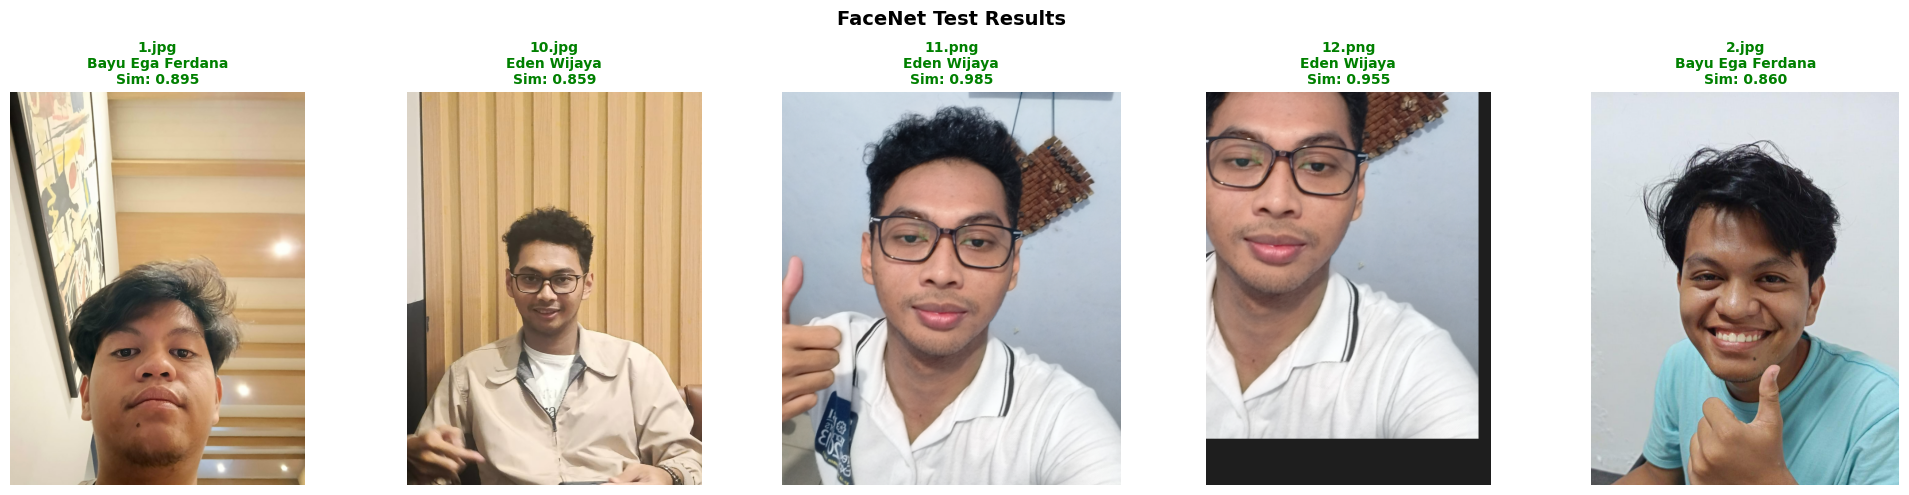

In [8]:
import os

test_dir = "../../test"
test_images = [f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"🧪 Testing on {len(test_images)} images...\n")

# Test dan collect results
results = []

for img_file in test_images[:5]:  # Test 5 pertama
    img_path = os.path.join(test_dir, img_file)
    predicted_name, similarity = model.predict(img_path, threshold=0.6)
    
    results.append({
        'file': img_file,
        'prediction': predicted_name,
        'similarity': similarity
    })
    
    print(f"📸 {img_file[:30]:<30} → {predicted_name:<25} (Sim: {similarity:.3f})")

# Visualisasi results
num_display = len(results)
fig, axes = plt.subplots(1, num_display, figsize=(4*num_display, 5))
if num_display == 1:
    axes = [axes]

for i, result in enumerate(results):
    img_path = os.path.join(test_dir, result['file'])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img_rgb)
    color = 'green' if result['prediction'] not in ['Unknown', 'No Face Detected'] else 'red'
    axes[i].set_title(f"{result['file'][:15]}\n{result['prediction']}\nSim: {result['similarity']:.3f}",
                     fontsize=10, fontweight='bold', color=color)
    axes[i].axis('off')

plt.suptitle('FaceNet Test Results', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 📊 Perbandingan: FaceNet vs ResNet50

| Metric | FaceNet (InceptionResnetV1) | ResNet50 |
|--------|----------------------------|----------|
| **Embedding Dimension** | 512 | 2048 |
| **Pretrained Dataset** | VGGFace2 (2.6M faces) | ImageNet (1.2M images) |
| **Training Method** | Triplet Loss | Classification Loss |
| **Face-specific** | ✅ Yes | ❌ No (generic features) |
| **Memory Usage** | Lower | Higher |
| **Inference Speed** | Faster | Slower |
| **Accuracy for Faces** | Excellent | Good |

### Kesimpulan:
**FaceNet lebih optimal untuk face recognition** karena:
- Embeddings lebih compact (512 vs 2048)
- Dilatih khusus untuk face recognition dengan triplet loss
- Pretrained pada dataset faces (VGGFace2)
- Inference lebih cepat dan efisien